In [1]:
import numpy as np
import mylibrary.nnlib as tnn

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

In [3]:
# linear regression
X = np.c_[x, np.ones(len(x))]
# Y = X@W
W = np.linalg.pinv(X)@y
W

array([1.091147  , 0.02215106])

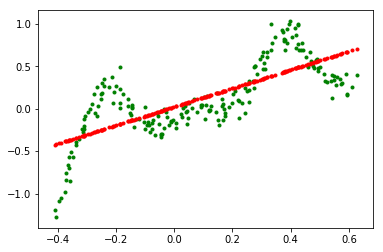

In [4]:
Y = X@W
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')

In [5]:
loss0 = tnn.MseLoss.loss(Y, y)
loss0

0.042772491976318834

## Trying for Relu activation function

In [6]:
class LeakyRelu(tnn.Layer):
    def __init__(self, alpha=0.01, ):
        tnn.layerList.append(self)
        self.x = None
        self.y = None
        self.alpha = alpha

    def forward(self, x):
        self.x = x
        toret = np.maximum(self.alpha * x, x)
        return toret

    def backward(self, y):
        self.y = y
        toret = np.minimum(y/self.alpha, y)
        return toret

In [7]:
class Sigmoid(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        toret = 1 / (1 + np.exp(-x))
        return toret

    def backward(self, y):
        return self.logit_(y)
    
    def logit_(self, x, epsilon = 1e-3):
        x = x.clip(min = epsilon, max=1-epsilon)
        return np.log(x / (1-x))

In [8]:
class Relu(tnn.Layer):
    def __init__(self,):
        tnn.layerList.append(self)
        self.x = None
        self.y = None

    def forward(self, x):
        self.x = x
        toret = np.maximum(0, x)
        return toret

    def backward(self, y):
        self.y = y
        toret = np.maximum(0, y)
        return toret

In [9]:
# leaky relu regression
X = np.c_[x, np.ones(len(x))]
# Y = _/ (X@W)
actf = Relu()
# actf = Sigmoid()
#
z = actf.backward(y)

In [10]:
mask = z!=0
X_ = X[mask]
z_ = z[mask]

[0.66616432 0.1679234 ] [0.58321923 0.2452186 ]


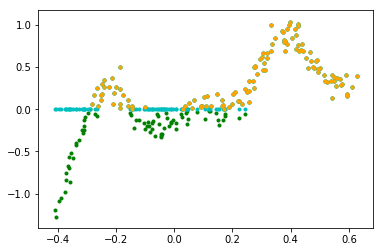

In [11]:
W = np.linalg.pinv(X)@z
W_ = np.linalg.pinv(X_)@z_

print(W, W_)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, z, marker='.', color='c')
plt.scatter(x[mask], z_, marker='.', color='orange')

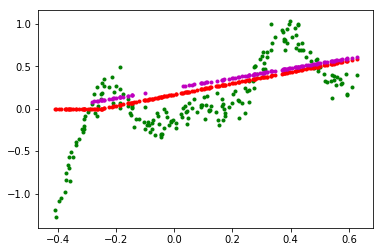

In [12]:
Y = actf.forward(X@W)
Y_ = actf.forward(X_@W_)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')
plt.scatter(x[mask], Y_, marker='.', color='m')


In [13]:
mask1 = mask.copy()
loss1 = tnn.MseLoss.loss(Y, y)
loss1_ = tnn.MseLoss.loss(Y_, y[mask1])

loss0, loss1, loss1_

(0.042772491976318834, 0.060786479828569176, 0.03114830119468326)

In [16]:
net1 = tnn.NonLinearLayer(1,1,activation=tnn.Relu(), optimizer=tnn.Adam())
# layer2 = tnn.BiasLayer(1, optimizer=tnn.Adam())
# net1 = tnn.AutoForm()
# net1.layerList = [layer1, layer2]

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = net1.forward(xx)
    loss = tnn.MseLoss.loss(a1, yy)
    dy = tnn.MseLoss.del_loss(a1, yy)
#     mask = a1==0.
#     dy[mask] = 0.
    dx = net1.backward(dy)
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, a1, marker='.', color='r')

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.058187197161579024


_______________________
epoch 10
Loss 0.05541669708166869


_______________________
epoch 20
Loss 0.054544919594534294


_______________________
epoch 30
Loss 0.05420681315439776


_______________________
epoch 40
Loss 0.05397949725958995


_______________________
epoch 50
Loss 0.053880066452642955


_______________________
epoch 60
Loss 0.05383726986055027


_______________________
epoch 70
Loss 0.05382083392268028


_______________________
epoch 80
Loss 0.05381694640118255


_______________________
epoch 90
Loss 0.05381591572395259


_______________________
epoch 100
Loss 0.05381542387882218


_______________________
epoch 110
Loss 0.05381521524959795


_______________________
epoch 120
Loss 0.05381514869736461


_______________________
epoch 130
Loss 0.05381512841265142


_______________________
epoch 140
Loss 0.05381512105007457


_______________________
epoch 150
Loss 0.05381511814604861


_______________________
epoch 16



_______________________
epoch 1340
Loss 0.053815116689969925


_______________________
epoch 1350
Loss 0.053815116689969925


_______________________
epoch 1360
Loss 0.053815116689969925


_______________________
epoch 1370
Loss 0.053815116689969925


_______________________
epoch 1380
Loss 0.053815116689969925


_______________________
epoch 1390
Loss 0.053815116689969925


_______________________
epoch 1400
Loss 0.053815116689969925


_______________________
epoch 1410
Loss 0.053815116689969925


_______________________
epoch 1420
Loss 0.053815116689969925


_______________________
epoch 1430
Loss 0.053815116689969925


_______________________
epoch 1440
Loss 0.053815116689969925


_______________________
epoch 1450
Loss 0.053815116689969925


_______________________
epoch 1460
Loss 0.053815116689969925


_______________________
epoch 1470
Loss 0.053815116689969925


_______________________
epoch 1480
Loss 0.053815116689969925


_______________________
epoch 1490
Loss 0.05381511668



_______________________
epoch 2660
Loss 0.053815116689969925


_______________________
epoch 2670
Loss 0.053815116689969925


_______________________
epoch 2680
Loss 0.053815116689969925


_______________________
epoch 2690
Loss 0.053815116689969925


_______________________
epoch 2700
Loss 0.053815116689969925


_______________________
epoch 2710
Loss 0.053815116689969925


_______________________
epoch 2720
Loss 0.053815116689969925


_______________________
epoch 2730
Loss 0.053815116689969925


_______________________
epoch 2740
Loss 0.053815116689969925


_______________________
epoch 2750
Loss 0.053815116689969925


_______________________
epoch 2760
Loss 0.053815116689969925


_______________________
epoch 2770
Loss 0.053815116689969925


_______________________
epoch 2780
Loss 0.053815116689969925


_______________________
epoch 2790
Loss 0.053815116689969925


_______________________
epoch 2800
Loss 0.053815116689969925


_______________________
epoch 2810
Loss 0.05381511668

TclError: this isn't a Tk application

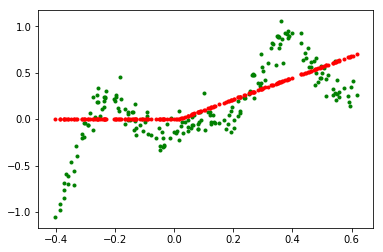

In [54]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1, marker='.', color='r')

(0.03933398211707285, 0.050042500235203666, 0.04417445659289398)

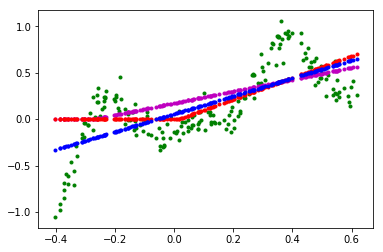

In [65]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='m')
plt.scatter(x, a1, marker='.', color='r')
# loss2 = float(np.copy(loss))
W = np.linalg.pinv(X)@y
Y0_ = X@W
plt.scatter(x, Y0_, marker='.', color='b')

loss2 = tnn.MseLoss.loss(a1, yy)
loss0, loss1, loss2

In [19]:
print(W)
print(net1.weights, net1.bias)

[0.67801846 0.16859046]
[[1.26785373]] [-0.03920748]


In [20]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F


# x_data = torch.from_numpy(xx).float()
# y_data = torch.from_numpy(yy).float()

# # init1 = nn.init.xavier_uniform_
# init2 = nn.init.normal_
# W1 = torch.empty(1,1, requires_grad=True)
# b1 = torch.zeros(1, requires_grad=True)
# b2 = torch.zeros(1, requires_grad=True)
# init2(W1)

# def forward(x):
#     global W1, b1, b2
# #     print(x.shape, W1.shape)
#     x = x.view((-1, 1))
#     z1 = x.mm(W1) + b1
#     a1 = F.leaky_relu(z1)- b2
#     return z1, a1


# params = [W1, b1, b2]
# # optimizer = torch.optim.Adam(params, lr=0.03)
# optimizer = torch.optim.SGD(params, lr=0.03)

# %matplotlib tk
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# plt.ion()
# fig.show()
# fig.canvas.draw()

# for step in range(1000000):
#     z1, a1 = forward(x_data)

#     optimizer.zero_grad()

#     loss_ = F.mse_loss(a1, y_data)
#     loss_.backward()
#     optimizer.step()

#     if step % 1000 == 0:

#         print('_______________________')
#         print("epoch", step)
#         losses = float(loss)
#         print("Loss", losses)


#         ax.clear()
#         plt.scatter(x, y, marker='.', color='g')
#         plt.scatter(x, a1.data.numpy(), marker='.', color='r')
        
#         fig.canvas.draw()
#         plt.pause(0.001)
#         print("\n")
#         if losses < 0.0025:
#             plt.pause(50)
#             break

In [21]:
# print(W)
# print(net1.weights, net1.bias)
# print(W1.data.numpy(), b1.data.numpy())

## recursive gradient for finding target

In [66]:
layer1 = tnn.LinearLayer(1,1,#weights=np.array([[1]]),
                         optimizer=tnn.SGD())
layer2 = tnn.Relu()
net2 = tnn.AutoForm()
net2.layerList = [layer1, layer2]

In [67]:
z1 = layer1.forward(xx)
z1_ = np.copy(z1)
for i in range(50):
    a1_ = layer2.forward(z1_)
    dy_ = tnn.MseLoss.del_loss(a1_, yy)
    dz1_ = layer2.backward(dy_)
    z1_ = z1_ - dz1_
tnn.MseLoss.loss(a1_, y)

0.12424179789066925

In [68]:
layer1.weights

array([[0.38316916]])

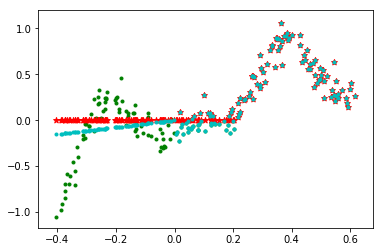

In [70]:
%matplotlib inline
a1_ = layer2.forward(z1_)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1_.reshape(-1), marker='*', color='r')
plt.scatter(x, z1_.reshape(-1), marker='.', color='c')

In [71]:
# X = np.c_[x, np.ones(len(x))]
# W = np.linalg.pinv(X)@z1_
# print(W)
# Y = layer2.forward(X@W)
# plt.scatter(x, y, marker='.', color='g')
# plt.scatter(x, Y, marker='.', color='r')

for i in range(500):
    z1 = layer1.forward(xx)    
    dz1_ = tnn.MseLoss.del_loss(z1, z1_)
    layer1.backward(dz1_)
    layer1.update()
a1_ = net2.forward(xx)
loss3 = tnn.MseLoss.loss(a1_, yy)
loss3

0.050214129309966535

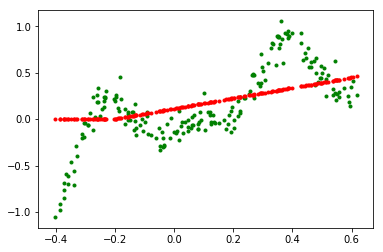

In [72]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1_.reshape(-1), marker='.', color='r')
# plt.scatter(x, z1_.reshape(-1), marker='.', color='c')

In [73]:
loss0, loss1, loss2, loss3

(0.03933398211707285,
 0.050042500235203666,
 0.04417445659289398,
 0.050214129309966535)

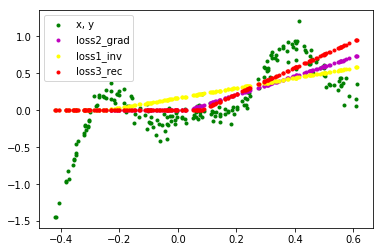

In [39]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x, y')
plt.scatter(x, a1, marker='.', color='m', label='loss2_grad')
plt.scatter(x, Y, marker='.', color='yellow', label='loss1_inv')
plt.scatter(x, a1_, marker='.', color='r', label='loss3_rec')
plt.legend()

In [36]:
# the relu is fitting the data where output is zero when forward passed

[0.67801846 0.16859046] [0.58044253 0.2646539 ]
-0.24865172962457877


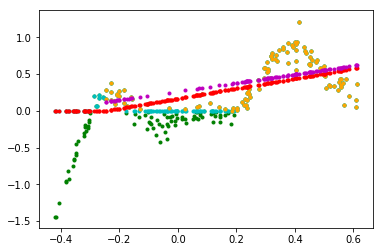

In [64]:
# leaky relu regression
X = np.c_[x, np.ones(len(x))]
# Y = _/ (X@W)
actf = Relu()
# actf = Sigmoid()
#
z = actf.backward(y)

mask1 = z!=0
xbreak = -W[1]/W[0]
mask2 = x> xbreak
mask = np.bitwise_and(mask1, mask2)
# print(mask1==mask2)
X_ = X[mask]
z_ = z[mask]

W = np.linalg.pinv(X)@z
W_ = np.linalg.pinv(X_)@z_
Y = actf.forward(X@W)
Y_ = actf.forward(X_@W_)

loss4 = tnn.MseLoss.loss(Y, yy)
loss4_ = tnn.MseLoss.loss(Y_, yy)


print(W, W_)
print(xbreak)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, z, marker='.', color='c')
plt.scatter(x[mask], z_, marker='.', color='orange')
plt.scatter(x, Y, marker='.', color='r')
plt.scatter(x[mask], Y_, marker='.', color='m')

0.05612132692796444 0.1205811333246425 0.12943711167408672


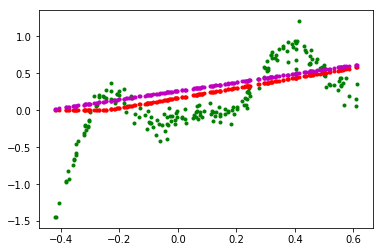

In [45]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')
plt.scatter(x, Y_, marker='.', color='m')
print(loss2, loss4, loss4_)

In [ ]:
print(W, W_)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, z, marker='.', color='c')
plt.scatter(x[mask], z_, marker='.', color='orange')